In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def LUdecomp(input_m):
    lower_m = []

    length = len(input_m)
    
    # 初始lower_m = 單位矩陣
    for i in range(0, length):
        lower_m.append([])
        for j in range(0, length):
            if i == j:
                lower_m[i].append(1)
            else:
                lower_m[i].append(0)

    # 次數
    for k in range(0, length - 1):
        # 高斯運算
        for i in range(k+1, length):
            # 找倍數
            multiple = input_m[i][k] / input_m[k][k]
            lower_m[i][k] = multiple

            for j in range(k, length):
                input_m[i][j] = input_m[i][j] - input_m[k][j] * multiple
    
    
    return [lower_m, input_m]

In [3]:
input_m = [
    [2, 3, 0, 1], 
    [4, 5, 3, 3], 
    [-2, -6, 7, 7],
    [8, 9, 5, 21]
]

a = LUdecomp(input_m)
print(np.array(a))

[[[ 1.  0.  0.  0.]
  [ 2.  1.  0.  0.]
  [-1.  3.  1.  0.]
  [ 4.  3.  2.  1.]]

 [[ 2.  3.  0.  1.]
  [ 0. -1.  3.  1.]
  [ 0.  0. -2.  5.]
  [ 0.  0.  0.  4.]]]


In [4]:
def GetDesignMatrix(input_m, n):
    design_m = []
    tmp_m = []

    for ele in input_m:
        for p in range(0, n):
            tmp_m.append(pow(ele[0], p))
        design_m.append(tmp_m)
        tmp_m = []
    
    return design_m

In [5]:
test = [
    [1, 12],
    [122, 34],
    [-12, 323]
]

b = GetDesignMatrix(test, 5)
np.array(b)

array([[        1,         1,         1,         1,         1],
       [        1,       122,     14884,   1815848, 221533456],
       [        1,       -12,       144,     -1728,     20736]])

In [6]:
def Transpose(input_m):
    x = len(input_m)
    y = len(input_m[0])

    tmp = []
    for i in range(0, y):
        tmp.append([])
        for j in range(0, x):
            tmp[i].append(input_m[j][i])

    return tmp

In [7]:
c = Transpose(test)
np.array(c)

array([[  1, 122, -12],
       [ 12,  34, 323]])

In [8]:
def MultifyMatrix(a, b):
    tmp = []
    x = len(a)
    y = len(b[0])
    n = len(b)

    for i in range(0, x):
        tmp.append([])
        for j in range(0, y):
            val = 0
            for k in range(0, n):
                val += a[i][k] * b[k][j]
            tmp[i].append(val)
    
    return tmp

In [9]:
test2 = [
    [2],
    [3]
]
a = MultifyMatrix(test, test2)
np.array(a)

array([[ 38],
       [346],
       [945]])

In [10]:
def AddMatrix(a, b):
    tmp = []
    x = len(a)
    y = len(a[0])
    
    for i in range(0, x):
        tmp.append([])
        for j in range(0, y):
            val = a[i][j] + b[i][j]
            tmp[i].append(val)
    return tmp

In [11]:
def SubtractMatrix(a, b):
    tmp = []
    x = len(a)
    y = len(a[0])
    
    for i in range(0, x):
        tmp.append([])
        for j in range(0, y):
            val = a[i][j] - b[i][j]
            tmp[i].append(val)
    return tmp

In [12]:
b = AddMatrix(test, test)
np.array(b)

array([[  2,  24],
       [244,  68],
       [-24, 646]])

In [13]:
def GetRegularMatrix(input_m, lam):
    input_m_t = Transpose(input_m)
    multify_m = MultifyMatrix(input_m_t, input_m)
    length = len(multify_m)
    for i in range(0, length):
        multify_m[i][i] += lam
    return multify_m
a = GetRegularMatrix(test, 3)
np.array(a)

array([[ 15032,    284],
       [   284, 105632]])

In [14]:
a = np.transpose(test)
b = np.array(test)
a.dot(b)

array([[ 15029,    284],
       [   284, 105629]])

In [15]:
f = open("testfile.txt")
allData = f.read()
f.close()

In [16]:
data = []
for ele in allData.split():
    ele = ele.split(",")
    data.append(ele)

for i in range(0, len(data)):
    for j in range(0, len(data[0])):
        data[i][j] = float(data[i][j])

In [17]:
data

[[-5.0, 51.76405234596766],
 [-4.795918367346939, 45.42306433039972],
 [-4.591836734693878, 41.274448104888755],
 [-3.979591836734694, 26.636216497466364],
 [-3.571428571428571, 20.256806057008426],
 [-2.9591836734693877, 11.618429243797276],
 [-2.7551020408163263, 10.450525068812203],
 [-1.7346938775510203, 1.8480982318414874],
 [-1.3265306122448979, -1.0405349639051173],
 [-0.9183673469387754, -4.614630798757861],
 [-0.7142857142857144, -1.3871977310902517],
 [-0.3061224489795915, -1.9916444039966117],
 [0.1020408163265305, -0.912924608376358],
 [0.7142857142857144, 6.63482003068499],
 [1.1224489795918373, 9.546867459016372],
 [1.7346938775510203, 15.72016146597016],
 [1.9387755102040813, 20.62251683859554],
 [2.5510204081632653, 33.48059725819715],
 [2.959183673469388, 40.76391965675495],
 [3.979591836734695, 66.8997605629381],
 [4.387755102040817, 78.44316465660981],
 [4.591836734693878, 86.99156782355371],
 [5.0, 99.78725971978604]]

In [18]:
design_m = GetDesignMatrix(data, 2)
np.array(design_m)

array([[ 1.        , -5.        ],
       [ 1.        , -4.79591837],
       [ 1.        , -4.59183673],
       [ 1.        , -3.97959184],
       [ 1.        , -3.57142857],
       [ 1.        , -2.95918367],
       [ 1.        , -2.75510204],
       [ 1.        , -1.73469388],
       [ 1.        , -1.32653061],
       [ 1.        , -0.91836735],
       [ 1.        , -0.71428571],
       [ 1.        , -0.30612245],
       [ 1.        ,  0.10204082],
       [ 1.        ,  0.71428571],
       [ 1.        ,  1.12244898],
       [ 1.        ,  1.73469388],
       [ 1.        ,  1.93877551],
       [ 1.        ,  2.55102041],
       [ 1.        ,  2.95918367],
       [ 1.        ,  3.97959184],
       [ 1.        ,  4.3877551 ],
       [ 1.        ,  4.59183673],
       [ 1.        ,  5.        ]])

In [19]:
regular_m = GetRegularMatrix(design_m, 0)
np.array(regular_m)

array([[ 23.        ,  -3.57142857],
       [ -3.57142857, 225.22907122]])

In [20]:
A = LUdecomp(regular_m)
L = A[0]
U = A[1]
np.array(A)

array([[[ 1.00000000e+00,  0.00000000e+00],
        [-1.55279503e-01,  1.00000000e+00]],

       [[ 2.30000000e+01, -3.57142857e+00],
        [ 0.00000000e+00,  2.24674502e+02]]])

In [21]:
def GetSolByLU(regular_m, b):
    A = LUdecomp(regular_m)
    L = A[0]
    U = A[1]

    y = []
    for i in range(0, len(L)):
        val = b[i][0]
        for j in range(0, i):
            val -= L[i][j] * y[j][0]
        y.append([val])

    x = []
    for i in range(0, len(U)):
        x.append([0])

    for i in range(len(U), 0, -1):
        val = y[i-1][0]
        for j in range(len(U), i, -1):
            val -= U[i-1][j-1] * x[j-1][0]
        x[i-1][0] = val / U[i-1][i-1]
    
    return x

In [22]:
test = [
    [2, 3, -1],
    [1, -1, 1],
    [3, -2, -9]
]
b = [[-2], [8], [9]]
x1 = GetSolByLU(test, b)
x2 = LUdecomp(test)
np.array(x1)

array([[ 4.],
       [-3.],
       [ 1.]])

In [23]:
b = []
for ele in data:
    b.append([ele[1]])
np.array(b)

array([[51.76405235],
       [45.42306433],
       [41.2744481 ],
       [26.6362165 ],
       [20.25680606],
       [11.61842924],
       [10.45052507],
       [ 1.84809823],
       [-1.04053496],
       [-4.6146308 ],
       [-1.38719773],
       [-1.9916444 ],
       [-0.91292461],
       [ 6.63482003],
       [ 9.54686746],
       [15.72016147],
       [20.62251684],
       [33.48059726],
       [40.76391966],
       [66.89976056],
       [78.44316466],
       [86.99156782],
       [99.78725972]])

In [164]:
def rLSE(data, power, lam):
    design_m = GetDesignMatrix(data, power)
    design_m_t = Transpose(design_m)

    b = []
    for ele in data:
        b.append([ele[1]])

    design_m_txb = MultifyMatrix(design_m_t, b)
    regular_m = GetRegularMatrix(design_m, lam)
    # x = GetSolByLU(regular_m, design_m_txb)
    L, U = LUdecomp(regular_m)

    inv_L = InverseLower(L)
    inv_U = InverseUpper(U)
    
    inv_regular_m = MultifyMatrix(inv_U, inv_L)
    x = MultifyMatrix(inv_regular_m, design_m_txb)
    return x

In [165]:
x1 = rLSE(data, 3, 0)
np.array(x1)

array([[-0.23140176],
       [ 4.90619026],
       [ 3.02385339]])

In [26]:
def LSEerror(data, coef_array):
    error = 0
    for ele in data:
        new_y = 0
        for i in range(0, len(coef_array)):
            new_y += pow(ele[0], i) * coef_array[i][0]
        error += pow(new_y - ele[1], 2)
    
    return error

In [27]:
def LSEerrorMatrix(a, b):
    error = 0
    x = len(a)
    y = len(a[0])
    
    for i in range(0, x):
        for j in range(0, y):
            error += pow(a[i][j] - b[i][j] ,2)
            
    return error

In [28]:
print(LSEerror(data, x1))

26.55995949933304


In [29]:
# 等等要改size
x_bef = np.random.uniform(low=min(data)[0], high=max(data)[1], size=(3,1)).tolist()

In [54]:
def GradientMatrix(data, power, x_bef):
    design_m = GetDesignMatrix(data, power)
    design_m_t = Transpose(design_m)
    
    b = []
    for ele in data:
        b.append([ele[1]])
    
    AtA = MultifyMatrix(design_m_t, design_m)
    AtAx = MultifyMatrix(AtA, x_bef)
    
    Atb = MultifyMatrix(design_m_t, b)
    
    gradient_m = MultipleMatrix(SubtractMatrix(AtAx, Atb) ,2)
    
    return gradient_m

In [55]:
a = GradientMatrix(data, 3, x_bef)
np.array(a)

array([[ 6520.56937528],
       [ 7026.784303  ],
       [81957.77737554]])

In [56]:
def HessionMatrix(data, power):
    design_m = GetDesignMatrix(data, power)
    design_m_t = Transpose(design_m)
    AtA = MultifyMatrix(design_m_t, design_m)
    hession_m = Inverse(MultipleMatrix(AtA, 2))
    
    return hession_m

In [57]:
b = HessionMatrix(data, 3)
c = MultifyMatrix(b, a)
c

[[91.50689370243228], [18.740485774054637], [5.4280578976633365]]

In [58]:
def NewtonMethod(data, power):
    x_bef = np.random.uniform(low=min(data)[0], high=max(data)[1], size=(power,1)).tolist()
    
    error = 99.9
    
    while(error > 0.01):
        gradient_m = GradientMatrix(data, power, x_bef)
        hession_m = HessionMatrix(data, power)

        x_aft = SubtractMatrix(x_bef, MultifyMatrix(hession_m, gradient_m))

        error = LSEerrorMatrix(x_aft, x_bef)
        
        x_bef = x_aft
    
    return x_aft

In [59]:
x2 = NewtonMethod(data, 2)
np.array(x2)

array([[29.30640471],
       [ 4.43295031]])

In [60]:
print(LSEerror(data, x2))

16335.123164957964


In [61]:
def PlotLSE(data, coef_array):
    X_data = []
    Y_data = []
    for ele in data:
        X_data.append(ele[0])
        Y_data.append(ele[1])

    x = np.linspace(min(X_data)-1, max(X_data)+1, 100)
    y = []
    for num in x:
        val = 0
        for i in range(0, len(coef_array)):
            val += pow(num, i) * coef_array[i][0]
        y.append(val)

    plt.figure(figsize=(10, 8))
    plt.plot(X_data, Y_data, 'ro')
    plt.plot(x, y)

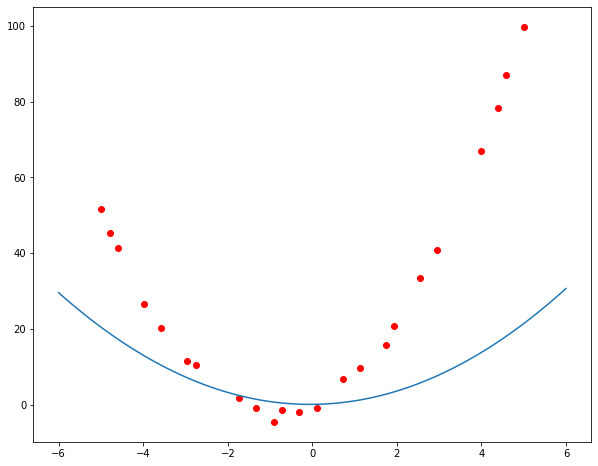

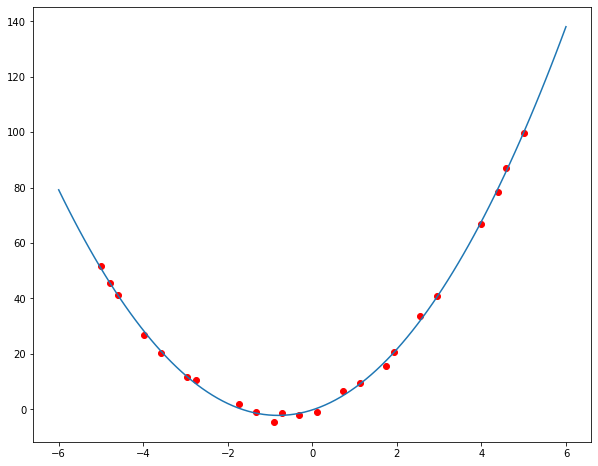

In [62]:
x1 = rLSE(data, 3, 10000)
PlotLSE(data, x1)

x2 = NewtonMethod(data, 3)
PlotLSE(data, x2)

In [63]:
def MultipleMatrix(input_m, k):
    x = len(input_m)
    y = len(input_m[0])
    tmp = []
    
    for i in range(0, x):
        tmp.append([])
        for j in range(0, y):
            val = k * input_m[i][j]
            tmp[i].append(val)
    return tmp

In [64]:
a = MultipleMatrix(test, 3)
np.array(a)

array([[  6. ,   9. ,  -3. ],
       [  0. ,  -7.5,   4.5],
       [  0. ,   0. , -34.2]])

In [65]:
test

[[2, 3, -1], [0.0, -2.5, 1.5], [0.0, 0.0, -11.4]]

In [66]:
a = np.random.uniform(low=0.5, high=13.3, size=(3,1))

In [43]:
b = a.tolist()
type(b)

list

In [44]:
a = [
    [1, 3, 2],
    [4, 2, 1],
    [3, 4, 2]
]

In [45]:
def GetCofactor(input_m, p, q):
    n = len(input_m)

    tmp1 = []
    tmp2 = []

    for i in range(0, n):
        for j in range(0, n):
            if i != p and j !=q:
                tmp1.append(input_m[i][j])

    for i in range(0, len(tmp1), n-1):
        tmp2.append(tmp1[i:i+n-1])

    return tmp2

In [46]:
b = GetCofactor(a, 1, 1)
np.array(b)

array([[1, 2],
       [3, 2]])

In [47]:
def Determinant(input_m):
    n = len(input_m)
    
    if n == 1:
        return input_m[0][0]

    sign = 1
    
    val = 0

    for i in range(0, n):
        tmp = GetCofactor(input_m, 0, i)
        val += sign * input_m[0][i] * Determinant(tmp)
        
        sign = -sign
        
    return val

In [48]:
val = Determinant(a)
print(val)

5


In [49]:
def GetAdjoint(input_m):
    n = len(input_m)
    tmp = []
    
    for i in range(0, n):
        tmp.append([])
        for j in range(0, n):
            cof = GetCofactor(input_m, i, j)
            val = pow(-1, i+j) * Determinant(cof)
            tmp[i].append(val)
    tmp = Transpose(tmp)
    
    return tmp

In [50]:
c = GetAdjoint(a)
c = MultipleMatrix(c, 1/val)
np.array(c)

array([[ 0. ,  0.4, -0.2],
       [-1. , -0.8,  1.4],
       [ 2. ,  1. , -2. ]])

In [51]:
def Inverse(input_m):
    determinant = Determinant(input_m)
    if determinant == 0:
        print("It's a singular matrix")
        return
    
    adjoint_m = GetAdjoint(input_m)
    inverse_m = MultipleMatrix(adjoint_m, 1/determinant)
    
    return inverse_m

In [52]:
np.array(Inverse(a))

array([[ 0. ,  0.4, -0.2],
       [-1. , -0.8,  1.4],
       [ 2. ,  1. , -2. ]])

In [53]:
t = [
    [1, 1],
    [2, 2]
]
Inverse(t)

It's a singular matrix


In [112]:
input_m = [
    [2, 3, 0, 1], 
    [4, 5, 3, 3], 
    [-2, -6, 7, 7],
    [8, 9, 5, 21]
]

a = LUdecomp(input_m)
print(np.array(a))

[[[ 1.  0.  0.  0.]
  [ 2.  1.  0.  0.]
  [-1.  3.  1.  0.]
  [ 4.  3.  2.  1.]]

 [[ 2.  3.  0.  1.]
  [ 0. -1.  3.  1.]
  [ 0.  0. -2.  5.]
  [ 0.  0.  0.  4.]]]


In [113]:
Determinant(a[1])

16.0

In [115]:
t = a[0]
print(t)
for i in range(0, len(input_m)):
    for j in range(0, len(input_m)):
        if i > j:
            cof = GetCofactor(a[0], j, i)
            val = pow(-1, i+j) * Determinant(cof)
            print(i, j, val)
            t[i][j] = val
np.array(t)

[[1, 0, 0, 0], [-2.0, 1, 0, 0], [-5.0, -3.0, 1, 0], [-32.0, -9.0, -2.0, 1]]
1 0 2.0
2 0 -1.0
2 1 3.0
3 0 28.0
3 1 3.0
3 2 2.0


array([[ 1.,  0.,  0.,  0.],
       [ 2.,  1.,  0.,  0.],
       [-1.,  3.,  1.,  0.],
       [28.,  3.,  2.,  1.]])

In [98]:
np.array(GetLowerAdjoint(a[0]))

array([[ 1., -0.,  0.],
       [-2.,  1., -0.],
       [ 7., -3.,  1.]])

In [135]:
def TriangleDeterminant(T):
    n = len(T)
    det = 1
    
    for i in range(0, n):
        det *= T[i][i]
    return det

In [154]:
def InverseLower(L):
    tmp = []
    n = len(L)
    det = TriangleDeterminant(L)
    if det == 0:
        print("It's a singular matrix")
        return
    
    for i in range(0, n):
        tmp.append([])
        for j in range(0, n):
            val = 0
            if i > j:
                cof = GetCofactor(L, j, i)
                val = pow(-1, i+j) * Determinant(cof) / det
            elif i == j:
                val = 1 / L[i][j]
            tmp[i].append(val)
    return tmp

In [158]:
def InverseUpper(U):
    tmp = []
    n = len(U)
    det = TriangleDeterminant(U)
    if det == 0:
        print("It's a singular matrix")
        return
    
    for i in range(0, n):
        tmp.append([])
        for j in range(0, n):
            val = 0
            if i < j:
                cof = GetCofactor(U, j, i)
                val = pow(-1, i+j) * Determinant(cof) / det
            elif i == j:
                val = 1 / U[i][j]
            tmp[i].append(val)
    return tmp

In [159]:
input_m = [
    [2, 3, 0, 1], 
    [4, 5, 3, 3], 
    [-2, -6, 7, 7],
    [8, 9, 5, 21]
]

L, U = LUdecomp(input_m)
print(L)
print(U)
inv_L = InverseLower(L)
inv_U = InverseUpper(U)
np.array(MultifyMatrix(inv_U, inv_L))

[[1, 0, 0, 0], [2.0, 1, 0, 0], [-1.0, 3.0, 1, 0], [4.0, 3.0, 2.0, 1]]
[[2, 3, 0, 1], [0.0, -1.0, 3.0, 1.0], [0.0, 0.0, -2.0, 5.0], [0.0, 0.0, 0.0, 4.0]]


array([[ 53.    , -15.1875,   8.875 ,  -3.3125],
       [-34.    ,   9.875 ,  -5.75  ,   2.125 ],
       [-11.    ,   3.375 ,  -1.75  ,   0.625 ],
       [ -3.    ,   0.75  ,  -0.5   ,   0.25  ]])

In [134]:
print(TriangleDeterminant(a))

1


In [168]:
a = [
    [1, 2],
    [3, 4]
]

a = np.array(a)
a = a@a
print(a)

[[ 7 10]
 [15 22]]
